In [338]:
import pandas as pd
import numpy as np

In [339]:
df=pd.read_csv("train_v9rqX0R.csv")
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [340]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x: x[:2])
df['New_Item_Type'] = df['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df.loc[df['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df=df.drop(['Item_Identifier','Outlet_Identifier','New_Item_Type'],axis=1)
df.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Non-Edible,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [341]:
for i in df:
    if df.dtypes[i]=='object':
        print(i)
        print(df[i].value_counts())

Item_Fat_Content
Low Fat       3612
Regular       2889
Non-Edible    1599
LF             222
reg            117
low fat         84
Name: Item_Fat_Content, dtype: int64
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64
Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64
Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928


In [342]:
df['Item_Visibility']=df.loc[:,'Item_Visibility'].replace([0],[df['Item_Visibility'].mean()])

In [343]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [344]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Item_Fat_Content']=labelencoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=labelencoder.fit_transform(df['Item_Type'])
df['Outlet_Location_Type']=labelencoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=labelencoder.fit_transform(df['Outlet_Type'])
df.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,Medium,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,Medium,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,Medium,0,1,2097.2700
3,19.20,2,0.066132,6,182.0950,1998,NaN,2,0,732.3800
4,8.93,1,0.066132,9,53.8614,1987,High,2,1,994.7052


In [345]:
df=df.fillna({'Item_Weight':df['Item_Weight'].mean()})
df=df.fillna({'Outlet_Size':df['Outlet_Size'].mode()[0]})
df.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,Medium,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,Medium,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,Medium,0,1,2097.2700
3,19.20,2,0.066132,6,182.0950,1998,Medium,2,0,732.3800
4,8.93,1,0.066132,9,53.8614,1987,High,2,1,994.7052


In [346]:
df['Outlet_Size']=labelencoder.fit_transform(df['Outlet_Size'])
df.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,2,0.066132,6,182.0950,1998,1,2,0,732.3800
4,8.93,1,0.066132,9,53.8614,1987,0,2,1,994.7052


In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int64  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int64  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int64  
 7   Outlet_Location_Type       8523 non-null   int64  
 8   Outlet_Type                8523 non-null   int64  
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 666.0 KB


In [348]:
df['Outlet_Establishment_Year']=2013-df['Outlet_Establishment_Year']

In [349]:
import seaborn as sns

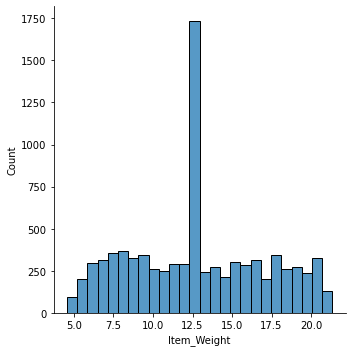

In [350]:
sns.displot(df['Item_Weight'])

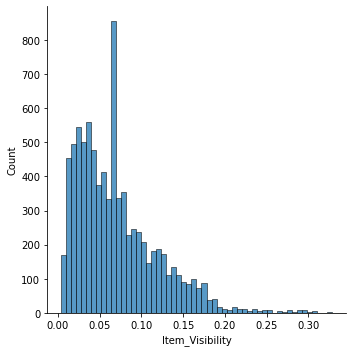

In [351]:
sns.displot(df['Item_Visibility'])

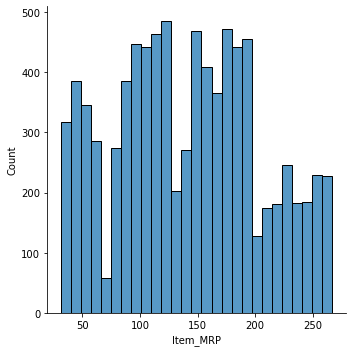

In [352]:
sns.displot(df['Item_MRP'])

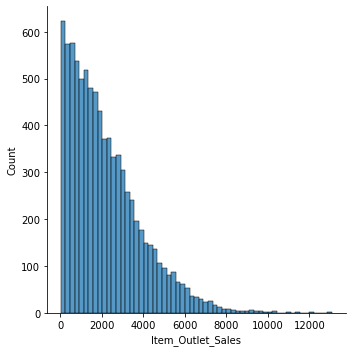

In [353]:
sns.displot(df['Item_Outlet_Sales'])

In [354]:
import numpy as np
df['Item_Outlet_Sales']=np.log(1+df['Item_Outlet_Sales'])

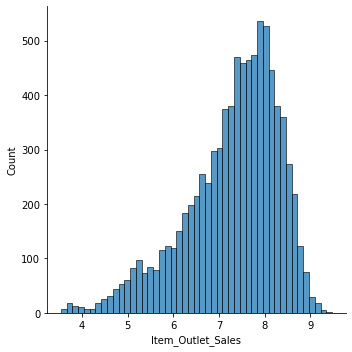

In [355]:
sns.displot(df['Item_Outlet_Sales'])

In [356]:
X=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

In [357]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)


Model Report
MSE: 0.4267648823487946
CV Score: 0.42803699963089176


<AxesSubplot:title={'center':'Model Coefficients'}>

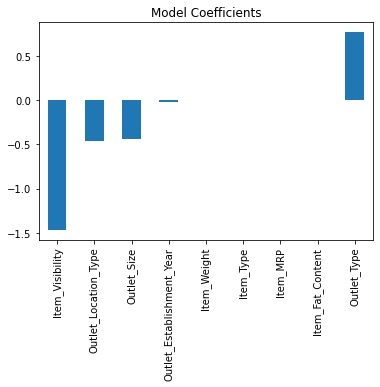

In [358]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

In [359]:
df.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,14,1,0,1,8.225808
1,5.92,2,0.019278,14,48.2692,4,1,2,2,6.096776
2,17.50,0,0.016760,10,141.6180,14,1,0,1,7.648868
3,19.20,2,0.066132,6,182.0950,15,1,2,0,6.597664
4,8.93,1,0.066132,9,53.8614,26,0,2,1,6.903451


Model Report
MSE: 0.6151069460886159
CV Score: 0.6159856031521341
0.4030951636211815


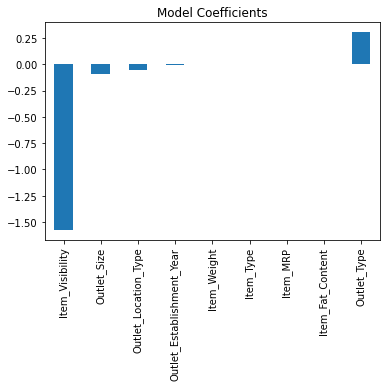

In [360]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")
print(model.score(x,y))

Model Report
MSE: 0.7628688679102086
CV Score: 0.7630789166281843


<AxesSubplot:title={'center':'Model Coefficients'}>

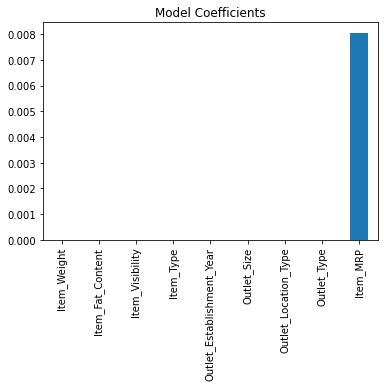

In [361]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")


Model Report
MSE: 5.5534030638578795e-34
CV Score: 0.5708637047950168


<AxesSubplot:title={'center':'Feature Importance'}>

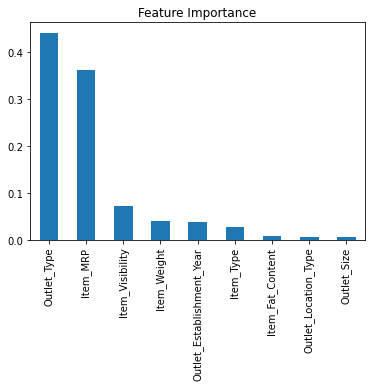

In [362]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

Model Report
MSE: 0.04214594747617732
CV Score: 0.30981979307666535


<AxesSubplot:title={'center':'Feature Importance'}>

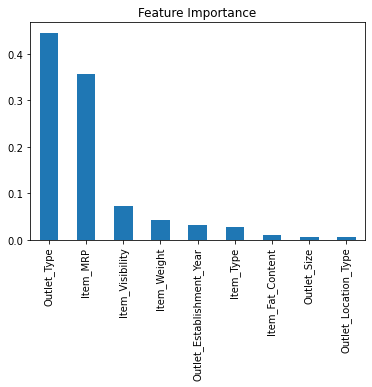

In [363]:
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

In [364]:
x_test=pd.read_csv('test_AbJTz2l.csv')

In [365]:
x_test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [366]:
x_ans=pd.DataFrame(x_test['Item_Identifier'])
x_ans.insert(1,'Outlet_Identifier',x_test['Outlet_Identifier'],True)
x_test['New_Item_Type'] = x_test['Item_Identifier'].apply(lambda x: x[:2])
x_test['New_Item_Type'] = x_test['New_Item_Type'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
x_test.loc[x_test['New_Item_Type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
x_test=x_test.drop(['Item_Identifier','Outlet_Identifier','New_Item_Type'],axis=1)
x_test['Item_Visibility']=x_test.loc[:,'Item_Visibility'].replace([0],[x_test['Item_Visibility'].mean()])
x_test['Item_Fat_Content']=x_test['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
x_test['Item_Weight']=x_test['Item_Weight'].fillna(x_test['Item_Weight'].mean())
x_test['Outlet_Size']=x_test['Outlet_Size'].fillna(x_test['Outlet_Size'].mode()[0])
x_test['Item_Fat_Content']=labelencoder.fit_transform(x_test['Item_Fat_Content'])
x_test['Item_Type']=labelencoder.fit_transform(x_test['Item_Type'])
x_test['Outlet_Location_Type']=labelencoder.fit_transform(x_test['Outlet_Location_Type'])
x_test['Outlet_Type']=labelencoder.fit_transform(x_test['Outlet_Type'])
x_test['Outlet_Size']=labelencoder.fit_transform(x_test['Outlet_Size'])

In [367]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   int64  
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   int64  
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                5681 non-null   int64  
 7   Outlet_Location_Type       5681 non-null   int64  
 8   Outlet_Type                5681 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 399.6 KB


In [368]:
y_test=model.predict(x_test)

In [369]:
y_test=np.exp(y_test)+1

In [370]:
x_ans.insert(2,"Item_Outlet_Sales",y_test,True)

In [371]:
x_ans.head(5)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1850.252821
1,FDW14,OUT017,1421.176418
2,NCN55,OUT010,671.224387
3,FDQ58,OUT017,2125.373110
4,FDY38,OUT027,5327.077667


In [372]:
x_ans.to_csv("sample_submission_8RXa3c6.csv",index=False)